In [1]:
import pandas as pd
import numpy as np
import sys, os
import codecs, os, nltk
import matplotlib.pyplot as plt
#from nltk import pos_tag, word_tokenize
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
import math
from textblob import TextBlob as tb

Our dataset is a collection of Twitter conversations (tweets), that is dividied into two different sentiments such as positive and negative messages. Each sentimets has 100000 tweets. Before the dataset analysis step, the redundant tweets needed to be deleted. We used the Notepad++ tool plugins for that purpose which gave us unique tweets as the result. There were 91088 tweets in the negative and 90233 tweets in the positive datasets. The two datasets are imported from the 'twitter-datasets' folder.

In [2]:
corpus_root = 'twitter-datasets'

trains = list()
for train_file in os.listdir(corpus_root): # use os functions to be os independent
    if ".txt" in train_file:
        print(train_file)
        with codecs.open(os.path.join(corpus_root,train_file),encoding="utf8") as f: # use codecs for a variety of encodings
            trains.append(f.read())

train_neg - deleted_samerows.txt
train_pos - deleted_samerows.txt


The analysis starts with comparing the usage of tags and shared links in terms of people's behaviour of using them in positive and negative tweets respectively. After that, we computed the average use of tag and link in two datasets.

In [3]:
# We have 91088 users in train_neg dataset. 

# Avarage tag for each user
av_tagfor_neg = trains[0].count("<user>")/91088
# Avarage link for each user
av_urlfor_neg = trains[0].count("<url>")/91088

In [4]:
# We have 90233 users in train_pos dataset. 

# Avarage tag for each user
av_tagfor_pos = trains[1].count("<user>")/90233
# Avarage link for each user
av_urlfor_pos = trains[1].count("<url>")/90233

In [5]:
tags = [av_tagfor_neg, av_tagfor_pos]
urls = [av_urlfor_neg, av_urlfor_pos]

We created the plot from the result.

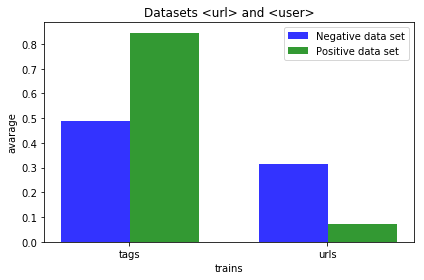

In [6]:
# tags,urls to plot
n_groups = 2
neg = [av_tagfor_neg, av_urlfor_neg]
pos = [av_tagfor_pos, av_urlfor_pos]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, neg, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Negative data set')
 
rects2 = plt.bar(index + bar_width, pos, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Positive data set')
 
plt.xlabel('trains')
plt.ylabel('avarage')
plt.title('Datasets <url> and <user>')
plt.xticks(index + 0.17, ('tags', 'urls'))
plt.legend()
 
plt.tight_layout()
plt.show()

First of all, we can see from the plot that people use tags more than url. Furthermore, as shown in the plot, people tend to use tags more in positive massages than negative. This gives an opservation that people like to share their happy moments with others by mentioning them or giving them credits. On the other hand, the usage of URL link is considerably lower than the usage of tags in the positive dataset.

After the above analysis, the links and tags needed to be deleted from the dataset because first we have obtained the necessary results, and second they may be miscomputed as adjective or noun tokens. Again, we used the Notepad++ tool plugins for this purpose because jupyter notebook was very slow for around 90000 tweets per dataset. Also, we had only two separate datasets so we concidered the Notepad++ tool as suitable for deleting the tags and links. The two datasets are imported from the 'cleared datasets2' folder.

In [7]:
corpus_root = 'cleared datasets2'

cleared_trains = list()
for train_file in os.listdir(corpus_root): # use os functions to be os independent
    if ".txt" in train_file:
        print(train_file)
        with codecs.open(os.path.join(corpus_root,train_file),encoding="utf8") as f: # use codecs for a variety of encodings
            cleared_trains.append(f.read())

train_neg - deleted_url_user.txt
train_pos - deleted_url_user.txt


Before counting word occurance in the datasets, the punctuations needed to be deleted by replacing with empty space.

In [8]:
import string
replace_punctuation = str.maketrans(string.punctuation, ' '*len(string.punctuation))
cleared_trains_neg = cleared_trains[0].translate(replace_punctuation)
cleared_trains_pos = cleared_trains[1].translate(replace_punctuation)
# also deleted numbers
cleared_trains_neg = ''.join([i for i in cleared_trains_neg if not i.isdigit()])
cleared_trains_pos = ''.join([i for i in cleared_trains_pos if not i.isdigit()])

Convert all uppercase letters into lowercase to make them identical so that they would be counted as the same.

In [88]:
cleared_trains_neg = cleared_trains_neg.lower()
cleared_trains_pos = cleared_trains_pos.lower()

Split every word to count them one by one.

In [89]:
word_list1 = cleared_trains_neg.split()
word_list2 = cleared_trains_pos.split()

neg = {}
for word in word_list1:
    neg[word] = neg.get(word, 0) + 1
    
pos = {}
for word in word_list2:
    pos[word] = pos.get(word, 0) + 1
    
neg_word_freq = []
for key, value in neg.items():
    neg_word_freq.append((value, key))
    
pos_word_freq = []
for key, value in pos.items():
    pos_word_freq.append((value, key))

In [122]:
neg_word_freq.sort(reverse=True)
pos_word_freq.sort(reverse=True)

In order to characterize all words as either positive or negative, we calculated the difference of each word's count between two datasets.

In [95]:
#Data frame of positive dataset
df_pos = pd.DataFrame(pos_word_freq)
df_pos.columns = ['count','words']
df_pos = df_pos.set_index('words')

#Data frame of negative dataset
df_neg = pd.DataFrame(neg_word_freq)
df_neg.columns = ['count','words']
df_neg = df_neg.set_index('words')

In [123]:
#Subtract negative dataset's words from positive dataset's words
result_subt = df_pos.subtract(df_neg, fill_value=0)
result_subt.sort_values(['count'])

,count
words,
the,-6901.0
of,-6768.0
frame,-6679.0
i,-6571.0
t,-4906.0
this,-3944.0
is,-3350.0
in,-3159.0
paperback,-2881.0


Create plot from the result

In [129]:
df1 = result_subt.sort_values(['count']).head(30)
df2 = result_subt.sort_values(['count']).tail(30)
frames = [df1, df2]
con_pos_neg_fr = pd.concat(frames)

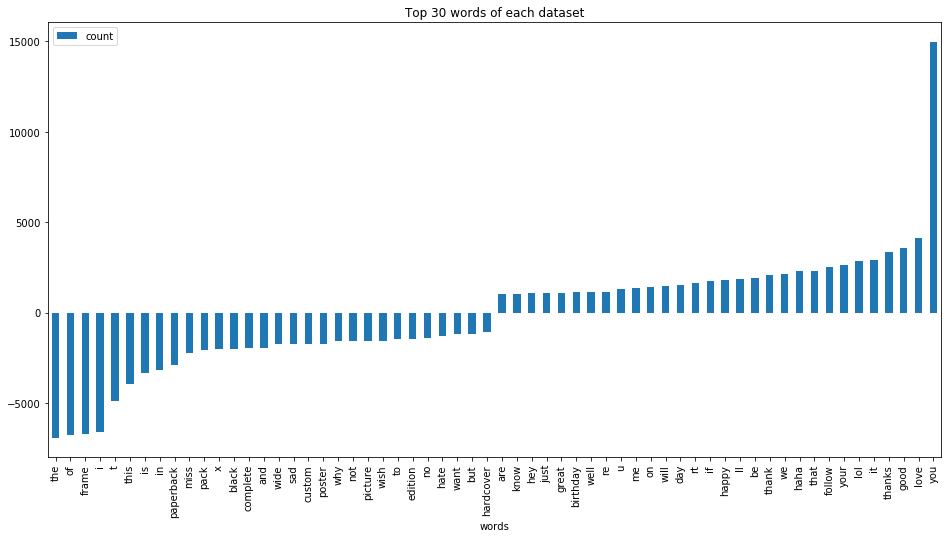

In [187]:
%matplotlib inline
con_pos_neg_fr.plot(kind='bar',title="Top 30 words of each dataset", figsize=(16, 8))

The above plot shows the top 30 words of each dataset. From these 60 words, we can simply observe the obvious negative and positive words respectively for each datasets. However, there are other words as well such as prepositions and pronouns. From these words, 'You' and 'I' are so different in two datasets. 'I' is highly used in negative dataset on the contrary 'you' is used much more in the positive dataset. On one hand, we can conclude that people tend to blame themselves or regret for something they've done on the internet. On the other hand, the pronoun 'you' is used far more in the positive tweets, which gives a conclusion that people tend to praise or congratulate others using the Twitter. Also, the positive dataset has many retweets, which shows that people like to share positive informations on the Twitter.

Adjective play an important role in distinguishing positive and negative tweets since are used much more in tweets comparing to nouns and verbs.

Let’s do some analysis for each tweet’s word

In [173]:
#Create txt file for counting the words in each tweet
trained_data_root = 'trained_data_root/'
filename1 = 'train_neg'
filepath1 = os.path.join(trained_data_root, filename1+'.txt');
file = open(filepath1,"w")  
file.write(cleared_trains_neg)  
file.close() 

filename2 = 'train_pos'
filepath2 = os.path.join(trained_data_root, filename2+'.txt');
file = open(filepath2,"w")  
file.write(cleared_trains_pos)  
file.close() 

In [174]:
def count_words(trained_data_root, filename):
    filepath = os.path.join(trained_data_root, filename);
    word_counts = []
    with open(filepath) as fp:
        for line in fp:        
            splited_line = line.strip().split(' ')
            cnt = 0
            for word in splited_line:
                if word != '':
                    cnt +=1 
            word_counts.append(cnt)    
    return word_counts

In [175]:
filename1 = 'train_neg.txt'
filename2 = 'train_pos.txt'
counted_words1 = count_words(trained_data_root, filename1)
counted_words2 = count_words(trained_data_root, filename2)
df1 = pd.DataFrame(counted_words1)
df2 = pd.DataFrame(counted_words2)

In [176]:
result = pd.concat([df1, df2], axis=1)
result.columns = ['neg_words', 'pos_words']
result.head()

,neg_words,pos_words
0,12,8.0
1,17,19.0
2,11,10.0
3,24,5.0
4,11,20.0


The above dataframe contains total word count of each tweet starting from first to last tweet of the two datasets.

In [177]:
result = result.describe().loc[['min','max', '25%', '75%', 'mean','std']]
result

,neg_words,pos_words
min,0.000000,0.000000
max,46.000000,37.000000
25%,9.000000,7.000000
75%,18.000000,16.000000
mean,13.788073,11.937506
std,5.766527,6.117623


In [178]:
# text = word_tokenize(cleared_trains[0])
# nltk.pos_tag(text)

In [180]:
Pos_neg = Counter([j for i,j in pos_tag(word_tokenize(cleared_trains_neg))])
Pos_neg = pd.DataFrame.from_dict(Pos_neg, orient='index').reset_index()
Pos_neg.head()

,index,0
0,UH,298
1,NN,351688
2,MD,12942
3,VB,62986
4,PRP,54186


In [188]:
Pos_neg

,index,0
0,UH,298
1,NN,351688
2,MD,12942
3,VB,62986
4,PRP,54186
5,VBP,75419
6,VBG,26792
7,DT,76032
8,VBZ,34151
9,JJ,161136


In [181]:
Pos_pos = Counter([j for i,j in pos_tag(word_tokenize(cleared_trains_pos))])
Pos_pos = pd.DataFrame.from_dict(Pos_pos, orient='index').reset_index()
Pos_pos.head()

,index,0
0,NNS,42823
1,VBP,77317
2,RB,69438
3,VBN,12926
4,IN,90900


In [189]:
Pos_pos

,index,0
0,NNS,42823
1,VBP,77317
2,RB,69438
3,VBN,12926
4,IN,90900
5,JJ,115939
6,WRB,7991
7,PRP$,28532
8,NN,239581
9,PRP,77505
